# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *HarrisOperator*
Compute corners by using the Harris operator or minimal direction
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, createImageF, plotImageL, plotImageF
from ImageOperatorsUtilities import applyCannyEdgeDetector

# Math and iteration
from timeit import itertools

### Parameters:
    imageName = Input image name
    GaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    kernelSize = Size of the kernel 
    k = Second term constant    
    op = H for Harris operator 
         M for minimum direction

### Read and show image

In [2]:
imageName = "Shapes.png"
GaussianKernelSize = 7
sobelKernelSize = 3
upperT = 0.4
lowerT = 0.2
kernelSize = 9
k = .02
op = "H"

### Read image and show image

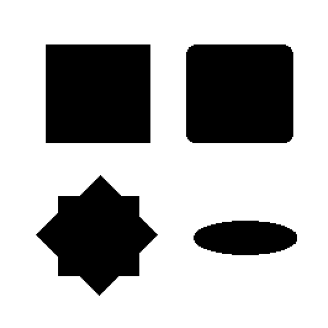

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter5/Input/")
inputImage, width, height = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Obtain the edges and set the kernel center

In [4]:
magnitude, angle, mX, mY = applyCannyEdgeDetector(inputImage, 
                                GaussianKernelSize, sobelKernelSize, upperT, lowerT, True)        \
# The center of the kernel
kernelCentre = int((kernelSize - 1) / 2)

### Compute curvature

In [5]:
curvature = createImageF(width, height)
for x,y in itertools.product(range(0, width), range(0, height)):
    # If it is an edge
    if magnitude[y,x] > 0:
        A, B, C = 0.0, 0.0, 0.0
        for wx,wy in itertools.product(range(0, kernelSize), range(0, kernelSize)):
            posY = y + wy - kernelCentre
            posX = x + wx - kernelCentre 
                
            if posY > -1 and posY <  height and posX > -1 and posX <  width:
                A += mX[posY,posX] * mX[posY,posX]
                B += mY[posY,posX] * mY[posY,posX]
                C += mX[posY,posX] * mY[posY,posX]
                    
        if op == "H":
                curvature[y,x] = (A * B) - (C * C) - (k * ((A+B) * (A+B)))
        if op == "M":
                d = mX[y,x] * mX[y,x] + mY[y,x] * mY[y,x]
                if d != 0.0:
                    curvature[y,x] = (A * mY[y,x] * mY[y,x] -                   \
                                      2.0 * C * mX[y,x] * mY[y,x] +             \
                                      B * mX[y,x] * mX[y,x]) / d

# Show result

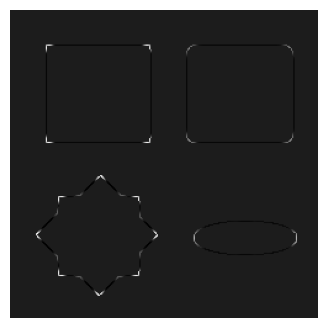

In [6]:
plotImageF(curvature, figureSize = 4)